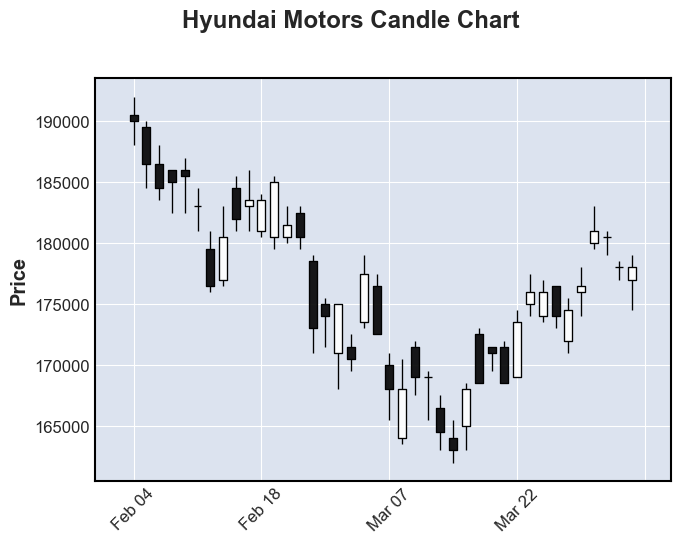

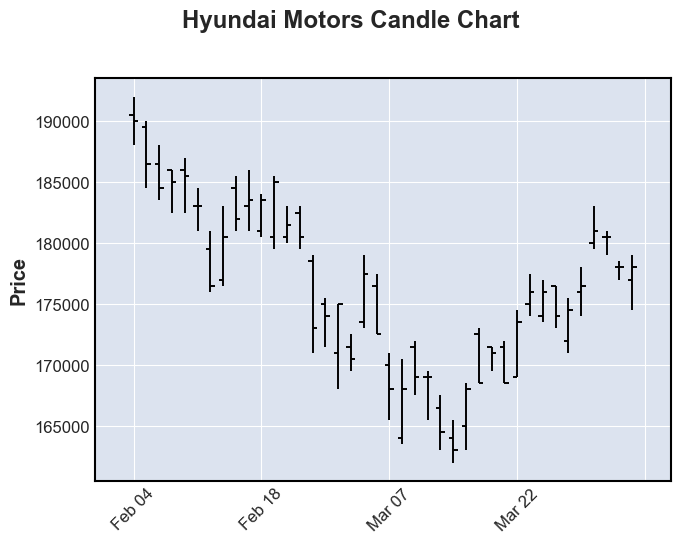

                Open           High            Low         Close        Volume
count      40.000000      40.000000      40.000000      40.00000  4.000000e+01
mean   176487.500000  178462.500000  174062.500000  176387.50000  8.859893e+05
std      6816.728575    6589.995817    6746.497192    6692.40624  3.182533e+05
min    164000.000000  165500.000000  162000.000000  163000.00000  4.260900e+05
25%    171500.000000  172875.000000  168875.000000  170875.00000  5.755398e+05
50%    176500.000000  178250.000000  173750.000000  176250.00000  8.657635e+05
75%    180625.000000  183250.000000  179625.000000  181625.00000  1.089930e+06
max    190500.000000  192000.000000  188000.000000  190000.00000  1.722526e+06


In [3]:
# 관련 모듈 중 구버전으로 하는 부분이 있는데 그건 4.4.3 참고

# pip install [--upgrage | -U] mplfinance
# 이 라이브러리의 가자 큰 장점은 OHLC 데이터 컬럼과 날짜시간 인덱스를 포함한
# 데이터프레임만 있으면 기존에 수동으로 처리했던 데이터 변환 작업을 
# 모두 자동화 해 준다는 점이다

# 기본적 사용법은 아래와 같다
'''
import mplfinance as mpf
mpf.plot(OHLC DF [, title=''] [, type=차트형태] [, mav=이동평균선] [, volume=거래량표기여부] [, ylabel=y축 레이블]
'''

# 아래의 실전 예제를 보자

# 맨 뒷페이지 숫자 구하기
from bs4 import BeautifulSoup
from urllib.request import urlopen
from urllib import request

headers = ('User-Agent','Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.82 Safari/537.36')
url = 'https://finance.naver.com/item/sise_day.naver?code=005380&page=1'
opener = request.build_opener()
opener.addheaders = [headers]
response = opener.open(url)

html = BeautifulSoup(response, 'lxml')
pgrr = html.find('td', class_='pgRR')

s = str(pgrr.a['href']).split('=')
last_page = s[-1]


import pandas as pd
from pandas import concat
import requests

# 특정 범위 페이지 읽어오기
df = pd.DataFrame()
sise_url = 'https://finance.naver.com/item/sise_day.naver?code=005380'

for page in range(1, 5):
    page_url = '{}&page={}'.format(sise_url, page)
    #df = df.append(pd.read_html(requests.get(page_url, headers={'User-agent': 'Mozilla/5.0'}).text)[0])
    # df 함수는 사라질 예정이어서, 아래와 같이 수정하며 앞으로 쭉 이런 식으로 사용하자
    df = pd.concat([df, pd.read_html(requests.get(page_url, headers={'User-agent': 'Mozilla/5.0'}).text)[0]])

df = df.dropna() # 값이 없는 행을 제거한다

df.iloc[0:3]
# mpf에 쓰기 위해 컬럼이름 영문으로 변경
df = df.rename(columns={'날짜':'Date', '시가':'Open', '고가':'High', '저가':'Low', '종가':'Close', '거래량':'Volume'})
# 오른차순으로 변경
df = df.sort_values(by='Date')
# df의 index를 설정한다 (datetime 형태로)
df.index = pd.to_datetime(df.Date)

df = df[['Open', 'High', 'Low', 'Close', 'Volume']]

# 이번 실습에서 처음쓰는 라이브러리로 캔들차트 그리기
import mplfinance as mpf
mpf.plot(df, title='Hyundai Motors Candle Chart', type='candle') # candle 차트
mpf.plot(df, title='Hyundai Motors Candle Chart', type='ohlc') # OHLC 차트


print(df.describe())

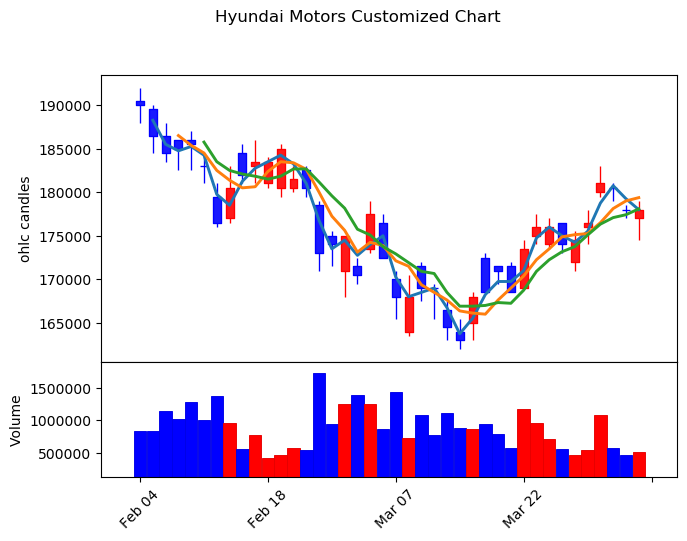

In [5]:
# 캔들의 색상을 바꾸고 하단에 그래프를 추가해서 거래량 표기 및 이동평균선 3개를 지정해서 출력해보자

# kwargs는 keyword arguments의 약자이며, mpf.plot() 함수를 호출할 때 쓰이는 여러 인수를 담는 딕셔너리임
kwargs = dict(title='Hyundai Motors Customized Chart', type='candle', mav=(2, 4, 6), volume=True, ylabel='ohlc candles')

# 마켓색상 함수는 스타일을 지정하는 필수 객체로, 상승에 red, 하락에 blue, 관련색상은 이를 따르도록 하였다.
mc = mpf.make_marketcolors(up='r', down='b', inherit=True)

# 마켓색상을 인수로 넘겨줘서 스타일 객체를 생성한다.
s = mpf.make_mpf_style(marketcolors=mc)

# 위에서 kwargs로 설정한 인수들과 스타일 객체를 인수로 넘겨주면서 mpf.plot()을 호출한다.
mpf.plot(df, **kwargs, style=s)